In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import umap

df = pd.read_csv(r"Housing processed.csv")

# Check for missing data
df.isnull().sum()

# Preprocessing: Handle missing values
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Impute missing values for both numerical and categorical columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine both transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


# Apply preprocessing and create the transformed features
X = preprocessor.fit_transform(df)

# Assuming the target variable is 'SalePrice' (the housing prices)
y = df['price']

C:\Users\samue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Use t-SNE for dimensionality reduction (2D)
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X)

C:\Users\samue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


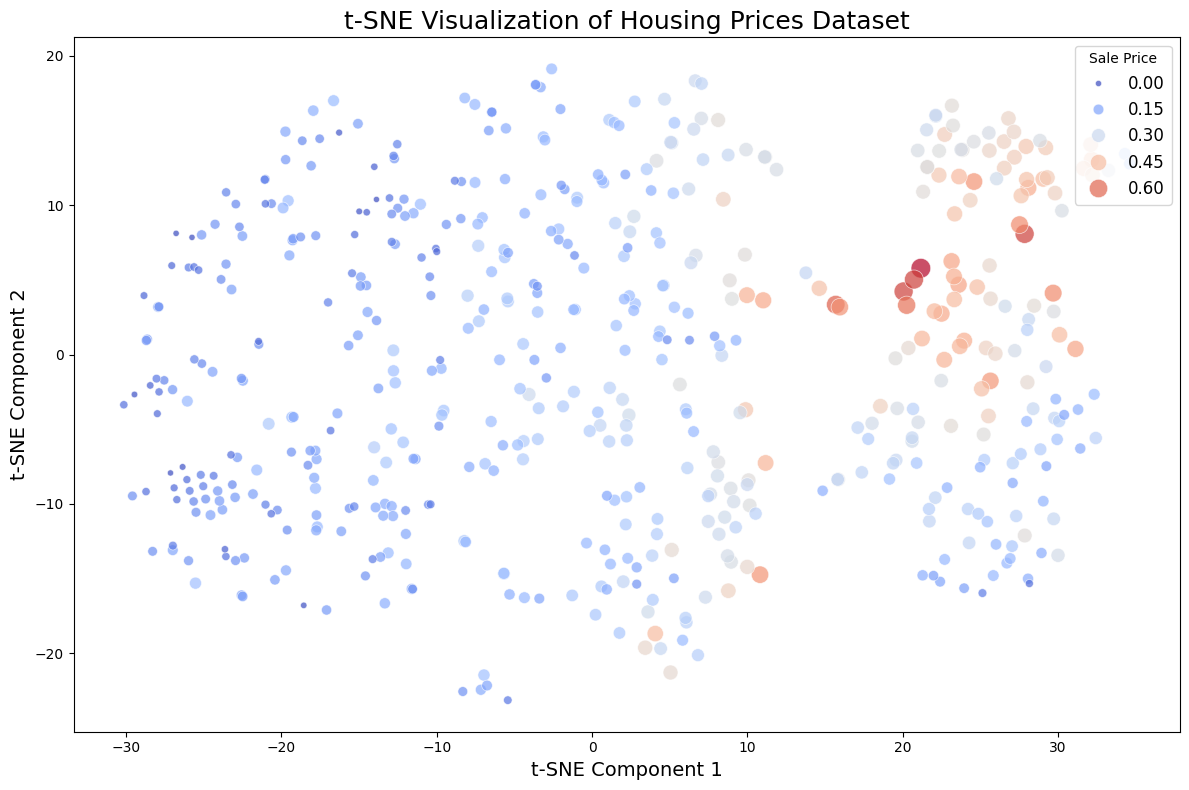

In [3]:
# Create a DataFrame for easy plotting
tsne_df = pd.DataFrame(X_tsne, columns=['tSNE_1', 'tSNE_2'])
tsne_df['SalePrice'] = y

# Plot the t-SNE visualization with enhanced aesthetics
plt.figure(figsize=(12, 8))

# Scatter plot with color mapping for SalePrice
sns.scatterplot(data=tsne_df, x='tSNE_1', y='tSNE_2', hue='SalePrice', palette='coolwarm', size='SalePrice', sizes=(20, 200), alpha=0.7, marker='o')

# Customize the plot
plt.title('t-SNE Visualization of Housing Prices Dataset', fontsize=18)
plt.xlabel('t-SNE Component 1', fontsize=14)
plt.ylabel('t-SNE Component 2', fontsize=14)
plt.legend(title='Sale Price', loc='upper right', fontsize=12)

# Improve layout and show the plot
plt.tight_layout()
plt.show()


C:\Users\samue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


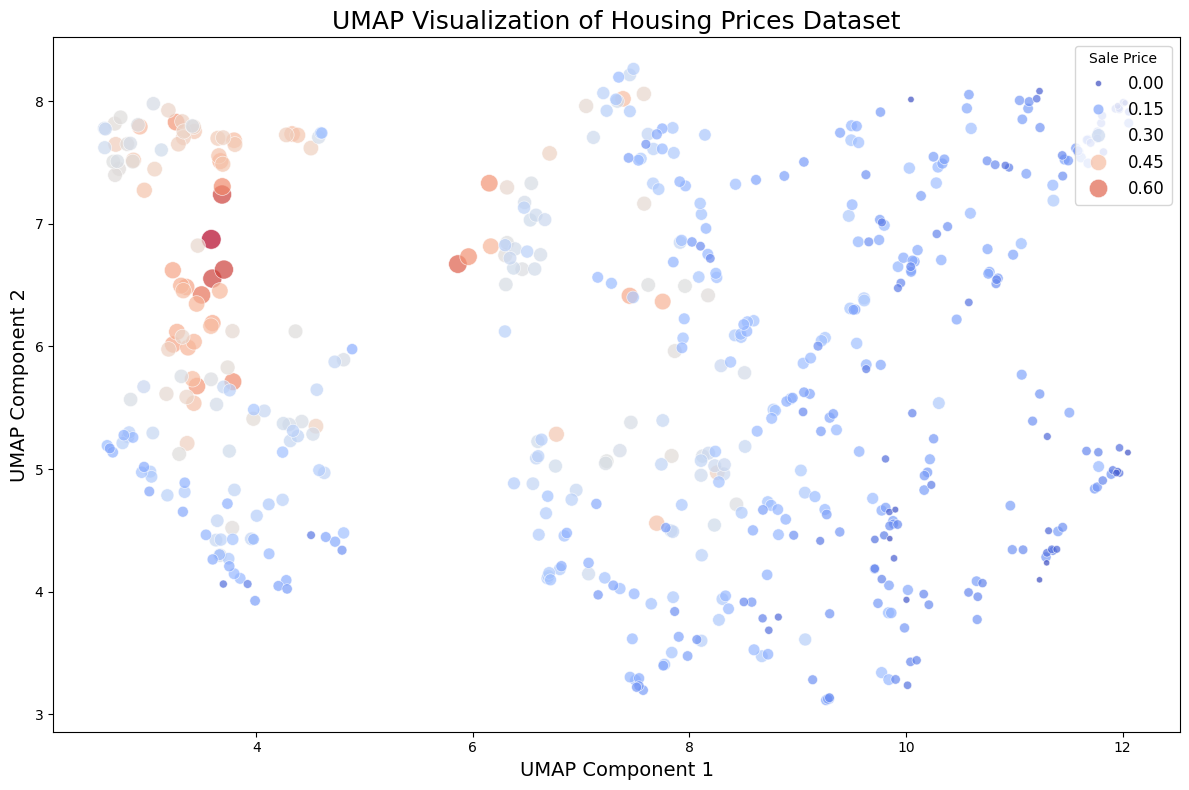

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import umap
from sklearn.preprocessing import StandardScaler


# Apply UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_model.fit_transform(X)

# Create a DataFrame for easy plotting
umap_df = pd.DataFrame(umap_result, columns=['UMAP_1', 'UMAP_2'])
umap_df['SalePrice'] = df['price']

# Plot the UMAP visualization with enhanced aesthetics
plt.figure(figsize=(12, 8))

# Scatter plot with color mapping for SalePrice
sns.scatterplot(
    data=umap_df,
    x='UMAP_1',
    y='UMAP_2',
    hue='SalePrice',
    palette='coolwarm',
    size='SalePrice',
    sizes=(20, 200),
    alpha=0.7,
    marker='o'
)

# Customize the plot
plt.title('UMAP Visualization of Housing Prices Dataset', fontsize=18)
plt.xlabel('UMAP Component 1', fontsize=14)
plt.ylabel('UMAP Component 2', fontsize=14)
plt.legend(title='Sale Price', loc='upper right', fontsize=12)

# Improve layout and show the plot
plt.tight_layout()
plt.show()
